In [1]:
import sys
sys.path.append("./src/")
import lumberjack
import tree_reader


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris_counts = np.loadtxt("./iris/iris.trunc")
print(iris_counts.shape)

(150, 4)


In [4]:
random_mask = np.random.random(150) < .1
print(np.sum(random_mask))

iris_train = iris_counts[np.logical_not(random_mask)]
iris_test = iris_counts[random_mask]

12


In [6]:
forest = lumberjack.fit(iris_train,trees=100,dispersion_mode="ssme",norm="l2",in_feature_subsample="2",out_feature_subsample="2",depth="10",leaves="5")

Setting context
Input:(138, 4)
Output:(138, 4)
CHECK TRUTH
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpbkfed3l2
['input.counts', 'tmp.ifh', 'output.counts', 'tmp.ofh']
Generating trees
Running /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1
Command: /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1 generate -ic /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpbkfed3l2/input.counts -oc /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpbkfed3l2/output.counts -o /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpbkfed3l2/tmp -auto -ifh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpbkfed3l2/tmp.ifh -ofh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpbkfed3l2/tmp.ofh -trees 100 -dispersion_mode ssme -norm l2 -in_feature_subsample 2 -out_feature_subsample 2 -depth 10 -leaves 5
Trying to readline

5.1 0
100
138,4

5.1 0
100
138,4
Automatic parameters:
ss:92
if:4
of:4
p:8
t:100
l:9
d:No
pm:Bran

Tree Pool: Sending 53
Tree Pool: Request for tree: 54
Tree Pool: Deriving 54
Deriving from prototype: 92,2,2
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpbkfed3l2/tmp.53.compact
Derived from prototype, rank table size: (2, 92)
Tree Pool: Growing 54
SSME
Unwrapping tree
Tree Pool: Sending 54
Tree Pool: Request for tree: 55
Tree Pool: Deriving 55
Deriving from prototype: 92,2,2
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpbkfed3l2/tmp.54.compact
Derived from prototype, rank table size: (2, 92)
Tree Pool: Growing 55
SSME
Unwrapping tree
Tree Pool: Sending 55
Tree Pool: Request for tree: 56
Tree Pool: Deriving 56
Deriving from prototype: 92,2,2
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpbkfed3l2/tmp.55.compact
Derived from prototype, rank table size: (2, 92)
Tree Pool: Growing 56
SSME
Unwrapping tree
Tree Pool: Sending 56
Tree Pool: Request for tree: 57
Tree Pool: Deriving 57
Deriving from prototype: 92,2,2
Serializing 

In [9]:
print(str(type(forest)))
leaves = forest.leaves()
print(leaves[1].samples)

<class 'tree_reader.Forest'>
['89', '89', '89', '61']


[[0.4891304347826087, [[0.7111111111111111, [[0.34375, [[0.5454545454545454, [[0.5, []], [0.5, []]]], [0.45454545454545453, []]]], [0.65625, [[0.2857142857142857, [[0.5, []], [0.5, []]]], [0.7142857142857143, [[0.5333333333333333, [[0.5, []], [0.5, []]]], [0.4666666666666667, [[0.42857142857142855, []], [0.5714285714285714, []]]]]]]]]], [0.28888888888888886, [[0.38461538461538464, []], [0.6153846153846154, [[0.625, []], [0.375, []]]]]]]], [0.5108695652173914, [[0.5106382978723404, [[0.2916666666666667, [[0.42857142857142855, []], [0.5714285714285714, []]]], [0.7083333333333334, [[0.7647058823529411, [[0.46153846153846156, [[0.5, []], [0.5, []]]], [0.5384615384615384, [[0.5714285714285714, []], [0.42857142857142855, []]]]]], [0.23529411764705882, []]]]]], [0.48936170212765956, [[0.4782608695652174, [[0.7272727272727273, [[0.625, []], [0.375, []]]], [0.2727272727272727, []]]], [0.5217391304347826, [[0.75, [[0.3333333333333333, []], [0.6666666666666666, [[0.5, []], [0.5, []]]]]], [0.25, [

/Users/boris/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


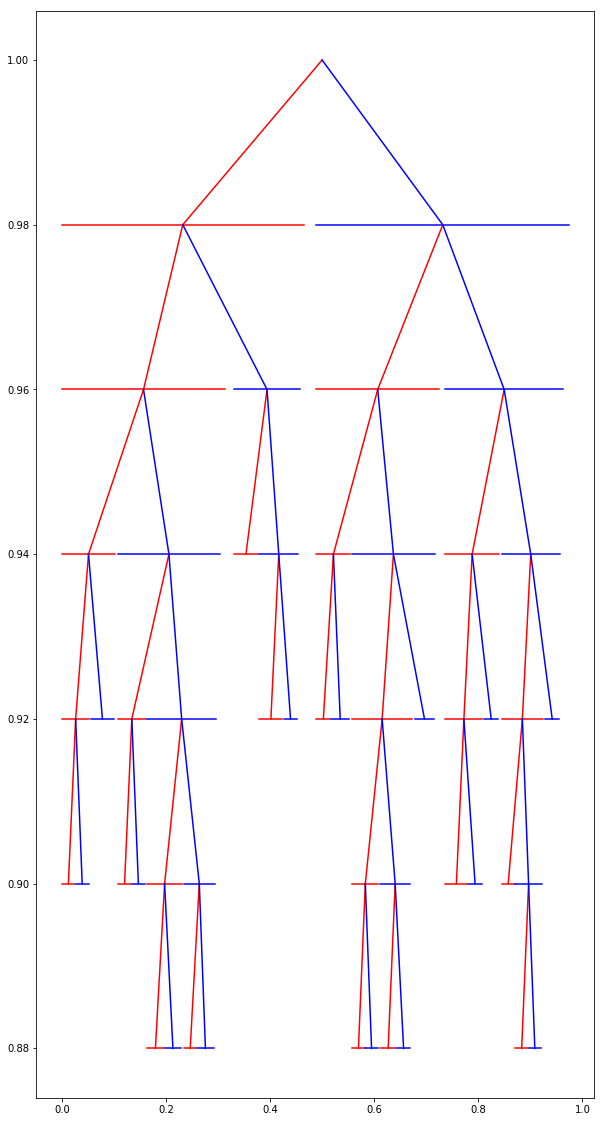

In [10]:
forest.trees[2].plot()
# print(forest.trees[0].root.features)
# print(forest.truth_dictionary.feature_dictionary)

In [11]:
forest.weigh_leaves()
weights = forest.feature_weight_matrix(leaves)
plt.figure()
plt.imshow(weights,aspect='auto')
plt.colorbar()
plt.show()
plt.figure()
plt.hist(np.sum(weights,axis=1),bins=50)
plt.show()

AttributeError: 'Forest' object has no attribute 'features'

In [12]:
forest_predictions = forest.predict_matrix(iris_test)

AttributeError: 'Forest' object has no attribute 'features'

In [ ]:
print(forest_predictions.shape)
print(forest_predictions)
print(iris_test)
plt.figure()
plt.imshow(iris_test - forest_predictions)
plt.colorbar()
plt.show()

In [ ]:
np.corrcoef(iris_test.flatten(),forest_predictions.flatten())

In [ ]:
forest.trees[1].plot_leaf_counts()